In [2]:
# The usual preamble
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
#pd.set_option('display.mpl_style', 'default')
plt.style.use(style='fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

Let's continue with our NYC 311 service requests example.

In [4]:
complaints = pd.read_csv('C:/Users/zesha/pandas-cookbook-master/data/311-service-requests.csv')

C:\Users\zesha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
complaints = pd.read_csv('C:/Users/zesha/pandas-cookbook-master/data/311-service-requests.csv')

C:\Users\zesha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 3.1 Selecting only noise complaints

I'd like to know which borough has the most noise complaints. First, we'll take a look at the data to see what it looks like:

In [5]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349.0,201984.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088.0,246531.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730.0,222727.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815.0,233545.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


To get the noise complaints, we need to find the rows where the "Complaint Type" column is "Noise - Street/Sidewalk". I'll show you how to do that, and then explain what's going on.

In [7]:
noise_complaints = complaints[complaints['Complaint Type'] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027.0,197389.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013.0,171076.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577.0,140964.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"


If you look at `noise_complaints`, you'll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let's deconstruct it into two pieces

In [ ]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

This is a big array of `True`s and `False`s, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to `True`.  It's important to note that for row filtering by a boolean array the length of our dataframe's index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the `&` operator like this:

In [8]:
#is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
is_noise = complaints['Complaint Type'].str.contains('Noise')
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
9,26594392,10/31/2013 01:34:41 AM,10/31/2013 02:23:51 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11225,835 NOSTRAND AVENUE,NOSTRAND AVENUE,UNION STREET,PRESIDENT STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 09:34:41 AM,10/31/2013 01:48:26 AM,09 BROOKLYN,BROOKLYN,997941.0,182725.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.668204,-73.950648,"(40.66820406598287, -73.95064760056546)"
10,26595176,10/31/2013 01:25:12 AM,NaN,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11218,3775 18 AVENUE,18 AVENUE,EAST 9 STREET,EAST 8 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Open,10/31/2013 09:25:12 AM,NaN,14 BROOKLYN,BROOKLYN,992726.0,170399.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634378,-73.969462,"(40.63437840816299, -73.96946177104543)"
20,26592932,10/31/2013 12:43:47 AM,10/31/2013 12:56:20 AM,NYPD,New York City Police Department,Noise - House of Worship,Loud Music/Party,House of Worship,11216,778 PARK PLACE,PARK PLACE,ROGERS AVENUE,NOSTRAND AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:43:47 AM,10/31/2013 12:56:20 AM,08 BROOKLYN,BROOKLYN,997608.0,184656.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.673505,-73.951844,"(40.67350473678714, -73.95184414979961)"
23,26592304,10/31/2013 12:38:00 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11216,371 TOMPKINS AVENUE,TOMPKINS AVENUE,MADISON STREET,PUTNAM AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Assigned,10/31/2013 08:38:00 AM,10/31/2013 01:16:53 AM,03 BROOKLYN,BROOKLYN,999720.0,188825.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.684944,-73.944221,"(40.6849442562592, -73.94422078036632)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937.0,170310.0,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"


Or if we just wanted a few columns:

In [9]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']][:10]

,Complaint Type,Borough,Created Date,Descriptor
9,Noise - Commercial,BROOKLYN,10/31/2013 01:34:41 AM,Loud Music/Party
10,Noise - House of Worship,BROOKLYN,10/31/2013 01:25:12 AM,Loud Music/Party
20,Noise - House of Worship,BROOKLYN,10/31/2013 12:43:47 AM,Loud Music/Party
23,Noise - Commercial,BROOKLYN,10/31/2013 12:38:00 AM,Loud Music/Party
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
37,Noise - Commercial,BROOKLYN,10/31/2013 12:20:44 AM,Loud Music/Party
42,Noise - Commercial,BROOKLYN,10/31/2013 12:15:06 AM,Loud Music/Party
43,Noise - Commercial,BROOKLYN,10/31/2013 12:14:42 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
76,Noise - Commercial,BROOKLYN,10/30/2013 11:50:30 PM,Loud Music/Party


# 3.2 A digression about numpy arrays

On the inside, the type of a column is `pd.Series`

In [ ]:
pd.Series([1,2,3])

and pandas Series are internally numpy arrays. If you add `.values` to the end of any `Series`, you'll get its internal numpy array

In [ ]:
np.array([1,2,3])

In [ ]:
pd.Series([1,2,3]).values

So this binary-array-selection business is actually something that works with any numpy array:

In [ ]:
arr = np.array([1,2,3])

In [ ]:
arr != 2

In [ ]:
arr[arr != 2]

# 3.3 So, which borough has the most noise complaints?

In [10]:
#is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
is_noise = complaints['Complaint Type'].str.contains('Noise')
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        4337
BROOKLYN         2344
QUEENS           1277
BRONX             719
STATEN ISLAND     258
Unspecified         7
Name: Borough, dtype: int64

It's Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [11]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()

In [14]:
noise_complaint_counts / complaint_counts

BRONX            0.036523
BROOKLYN         0.071268
MANHATTAN        0.178566
QUEENS           0.057313
STATEN ISLAND    0.053560
Unspecified      0.000985
Name: Borough, dtype: float64

In [15]:
noise_complaint_counts

MANHATTAN        4337
BROOKLYN         2344
QUEENS           1277
BRONX             719
STATEN ISLAND     258
Unspecified         7
Name: Borough, dtype: int64

In [16]:
complaint_counts

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: Borough, dtype: int64

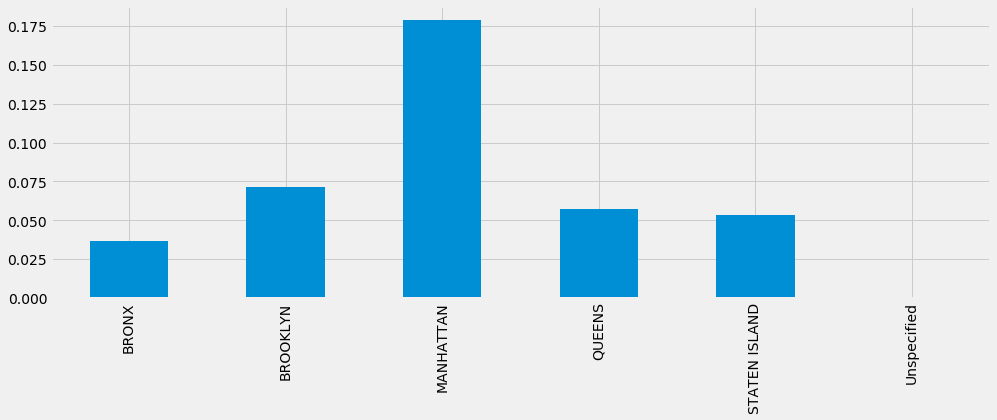

In [13]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')

So Manhattan really does complain more about noise than the other boroughs! Neat.

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  